<a href="https://colab.research.google.com/github/hyeonu96/first-repository/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_CutMix_%EB%98%90%EB%8A%94_Mixup_%EB%B9%84%EA%B5%90%EC%8B%A4%ED%97%98_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프로젝트: CutMix 또는 Mixup 비교실험 하기

0. 데이터 불러오기



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [2]:
# 학습 전에는 항상 GPU 환경을 확인
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import urllib3
urllib3.disable_warnings()

# 사용할 데이터셋을 불러오기
(ds_train, ds_test), ds_info = tfds.load(name='stanford_dogs',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         with_info=True,
                                         )
print('train dataset :', len(ds_train))
print('test dataset :', len(ds_test))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete5KVN7A/stanford_dogs-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete5KVN7A/stanford_dogs-test.tfrecord*...:   0%|   …

Dataset stanford_dogs downloaded and prepared to ~/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
train dataset : 12000
test dataset : 8580


데이터셋 정보 확인

In [4]:
# 데이터셋의 정보 확인
ds_info

tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around
    the world. This dataset has been built using images and annotation from
    ImageNet for the task of fine-grained image categorization. There are
    20,580 images, out of which 12,000 are used for training and 8580 for
    testing. Class labels and bounding box annotations are provided
    for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_path='~/tensorflow_datasets/stanford_dogs/0.2.0',
    file_format=tfrecord,
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
           

In [5]:
# feature 정보 확인
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
    }),
})


In [6]:
# splits 정보 확인
print(ds_info.splits)

{Split('train'): <SplitInfo num_examples=12000, num_shards=4>, Split('test'): <SplitInfo num_examples=8580, num_shards=4>}


In [7]:
# 데이터 개수 확인
print('train :', ds_info.splits['train'])
print('test  :', ds_info.splits['test'])

train : <SplitInfo num_examples=12000, num_shards=4>
test  : <SplitInfo num_examples=8580, num_shards=4>


In [8]:
# 데이터 개수 확인 
print('train :', tf.data.experimental.cardinality(ds_train))
print('test  :', tf.data.experimental.cardinality(ds_test))

train : tf.Tensor(12000, shape=(), dtype=int64)
test  : tf.Tensor(8580, shape=(), dtype=int64)


In [9]:
# 클래스의 개수 확인
num_classes = ds_info.features["label"].num_classes
print('class 개수 :', num_classes)

class 개수 : 120


In [10]:
# 클래스의 이름 확인
ds_info.features["label"].names

['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

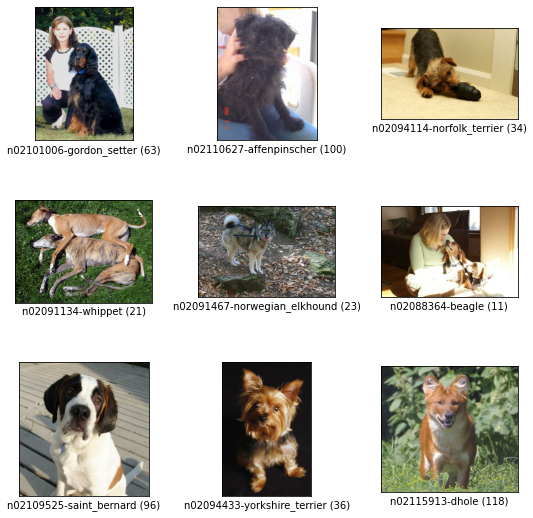

In [11]:
# 불러온 데이터셋 시각화
fig = tfds.show_examples(ds_train, ds_info)

1. Augmentation을 적용한 데이터셋 만들기

데이터셋에 augmentation 적용하는 함수

In [12]:
# 정규화 및 이미지 크기 변경하는 함수
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.image.resize(image, [224, 224])          
    image = tf.cast(image, tf.float32) / 255.           # 0~1 사이의 float32로 정규화
    return image, label

# label 원-핫 인코딩하는 함수
def onehot(image, label):
    onehot_label = tf.one_hot(label, num_classes,
                       on_value=1.0, off_value=0.0)
    return image, onehot_label


# 좌우 대칭 및 밝기 변경하는 함수
def augment(image,label):
    image = tf.image.random_flip_left_right(image)             # 좌우 대칭
    image = tf.image.random_brightness(image, max_delta=0.2)   # 밝기 변경
    return image, label


# 데이터셋에 augmentation 적용하는 함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False, with_cutmix=False, with_mixup=False):
    # 위에서 만든 normalize 함수를 병렬로 map 하기
    ds = ds.map(
        normalize_and_resize_img,   # 기본적인 전처리 함수 적용
        num_parallel_calls=2        # 병렬처리할 때 가용할 CPU 코어 개수
    )
    # apply base augmentation
    if not is_test and with_aug:
        ds = ds.map(
            augment
        )
        
    # split dataset into batches of batch_size    
    ds = ds.batch(batch_size)
    
    
    if not is_test and with_cutmix:      # apply CutMix augmentation
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    elif not is_test and with_mixup:     # apply MixUP augmentation
        ds = ds.map(
            mixup,
            num_parallel_calls=2
        )
    else:                                # apply one-hot encoding
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )

    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
        
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    
    return ds

In [13]:
# 데이터셋 불러오기
(ds_train, ds_test), ds_info = tfds.load('stanford_dogs',
                                         split=['train', 'test'],
                                         as_supervised=True,
                                         shuffle_files=True,
                                         with_info=True,
                                         )

Augmentation 적용하지 않은 데이터셋 생성

In [14]:
# Augmentation 적용하지 않은 데이터셋 생성
ds_train_no_aug = apply_normalize_on_dataset(ds_train)
ds_test_no_aug  = apply_normalize_on_dataset(ds_test, is_test=True)

기본 Augmentation 적용한 데이터셋 생성

In [15]:
# 기본 Augmentation 적용한 데이터셋 생성
ds_train_base_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test_base_aug = apply_normalize_on_dataset(ds_test,  with_aug=True, is_test=True)

Augmentation - CutMix

2개의 이미지 가져오기

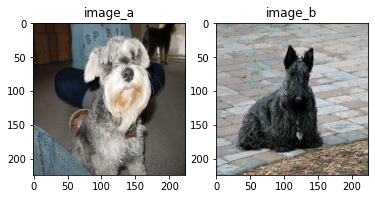

In [16]:
# 데이터셋에서 이미지 2개를 가져오기 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):  
    # print(image.shape)  # (16, 224, 224, 3)
    # print(label.shape)  # (16,)
    
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.title("image_a")
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.title("image_b")
plt.imshow(image_b)

삽입될 영역의 바운딩 박스의 위치

In [17]:
# 삽입될 영역의 바운딩 박스의 위치를 결정하는 함수
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]   # width
    image_size_y = image_a.shape[0]   # height
    
    # get entire area of box
    x = tf.cast( tf.random.uniform([], minval=0, maxval=image_size_x), tf.int32)
    y = tf.cast( tf.random.uniform([], minval=0, maxval=image_size_y), tf.int32)

    # get width, height of box
    width  = tf.cast(image_size_x * tf.math.sqrt(1-tf.random.uniform([],0,1)), tf.int32)
    height = tf.cast(image_size_y * tf.math.sqrt(1-tf.random.uniform([],0,1)), tf.int32)
    
    # clip box in image and get minmax bbox
    xa = tf.math.maximum(0, x-width//2)        # get point starting in an area larger than 0       
    ya = tf.math.maximum(0, y-height//2)              
    xb = tf.math.minimum(image_size_x, x+width//2)   # get point ending in an area smaller than the image size
    yb = tf.math.minimum(image_size_y, y+width//2)
    
    return xa, ya, xb, yb

xa, ya, xb, yb = get_clip_box(image_a, image_b)
print(xa, ya, xb, yb)

tf.Tensor(29, shape=(), dtype=int32) tf.Tensor(21, shape=(), dtype=int32) tf.Tensor(201, shape=(), dtype=int32) tf.Tensor(118, shape=(), dtype=int32)


2개 이미지 합치기

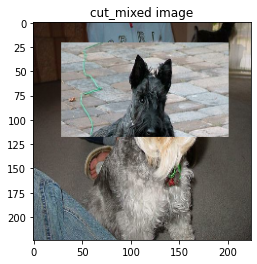

In [18]:
# 다른 이미지 b에서 바운딩 박스 안쪽 영역을 가져와서 합치는 함수
# mix two images
def mix_2_images(image_a, image_b, xa, ya, xb, yb):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    
    # combine areas divided into five parts
    one = image_a[ya:yb,0:xa,:]
    two = image_b[ya:yb,xa:xb,:]
    three = image_a[ya:yb,xb:image_size_x,:]
    middle = tf.concat([one,two,three],axis=1)
    
    top = image_a[0:ya,:,:]
    bottom = image_a[yb:image_size_y,:,:]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, xa, ya, xb, yb)

plt.title("cut_mixed image")
plt.imshow(mixed_img.numpy())

면적 비율로 라벨을 합치기

In [19]:
# 라벨을 만들 때 적절한 비율로 라벨을 합쳐주는 함수
# mix two labels
def mix_2_label(label_a, label_b, xa, ya, xb, yb, num_classes=120):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    
    # calculate the area ratio
    mixed_area = (xb-xa)*(yb-ya)
    total_area = image_size_x*image_size_y
    a = tf.cast(mixed_area/total_area, tf.float32)    # a = 1 − λ

    # print(label_a.shape)
    # print(len(label_a.shape))
    
    # apply one-hot encoding
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    
    # 면적 비율만큼 라벨값 할당
    mixed_label = (1-a)*label_a + a*label_b
    return mixed_label

mixed_label = mix_2_label(label_a, label_b, xa, ya, xb, yb)
print('cut_mixed label :', mixed_label)

cut_mixed label : tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.6674904  0.         0.
 0.33250958 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

배치 단위의 cutmix() 함수

In [20]:
# 배치 단위의 cutmix() 함수
def cutmix(image, label, prob = 1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([], 0, batch_size), tf.int32)  # 0 =< j < 16
        image_b = image[j]  
        label_b = label[j]
        
        # 삽입될 영역의 바운딩 박스의 위치를 결정하는 함수
        xa, ya, xb, yb = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, xa, ya, xb, yb))
        mixed_labels.append(mix_2_label(label_a, label_b, xa, ya, xb, yb))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs),(batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels),(batch_size, num_classes))
    
    return mixed_imgs, mixed_labels

CutMix Augmentation 적용한 데이터셋 생성

In [21]:
# CutMix Augmentation 적용한 데이터셋 생성
ds_train_cutmix_aug = apply_normalize_on_dataset(ds_train, with_cutmix=True) 
ds_test_cutmix_aug  = apply_normalize_on_dataset(ds_test,  with_cutmix=True, is_test=True)

Augmentation - MixUp

이미지 섞기

mixup_label : 
 tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.6674904  0.         0.
 0.33250958 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

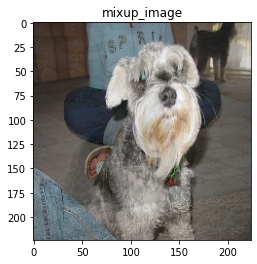

In [22]:
# 두 개 이미지의 픽셀별 값을 비율에 따라 섞어주는 함수
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b, num_classes=120):
    # 혼합 비율 선택
    a = tf.random.uniform([],0,1)
    
    # apply one-hot encoding of labels
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
        
    mixed_image = (1-a)*image_a + a*image_b
    mixed_label = (1-a)*label_a + a*label_b
    
    return mixed_image, mixed_label

mixed_img, _ = mixup_2_images(image_a, image_b, label_a, label_b, num_classes)

plt.title('mixup_image')
plt.imshow(mixed_img.numpy())
print('mixup_label : \n', mixed_label)

배치 단위의 mixup() 함수

In [23]:
# 위에서 구현한 함수를 활용하여 배치 단위의 mixup() 함수를 구현해 봅시다.
def mixup(image, label, prob = 1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b, num_classes)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs),(batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels),(batch_size, num_classes))
    
    return mixed_imgs, mixed_labels

MixUp Augmentation 적용한 데이터셋 생성

In [24]:
# MixUp Augmentation 적용한 데이터셋 생성
ds_train_mixup_aug = apply_normalize_on_dataset(ds_train, with_mixup=True) 
ds_test_mixup_aug  = apply_normalize_on_dataset(ds_test,  with_mixup=True, is_test=True)

2. 모델 만들기

학습할 ResNet-50 모델

In [25]:
# Augmentation을 적용하지 않은 데이터셋으로 학습시킬 ResNet
resnet50_no_aug = keras.models.Sequential([
    # ResNet50 중 imagenet에 훈련된 모델을 불러오기
    keras.applications.resnet.ResNet50(
        include_top=False,    # fully connected layer를 포함하지 않음
        weights='imagenet',
        input_shape=(224, 224,3),
        pooling='avg',
    ),
    # fully connected layer 추가
    keras.layers.Dense(num_classes, activation = 'softmax')
])

94765736/94765736 [==============================] - 0s 0us/step


In [26]:
# 기본 Augmentation을 적용한 데이터셋으로 학습시킬 ResNet
resnet50_base_aug = keras.models.Sequential([
    # ResNet50 중 imagenet에 훈련된 모델을 불러오기
    keras.applications.resnet.ResNet50(
        include_top=False,    # fully connected layer를 포함하지 않음
        weights='imagenet',
        input_shape=(224, 224,3),
        pooling='avg',
    ),
    # fully connected layer 추가
    keras.layers.Dense(num_classes, activation = 'softmax')
])

In [27]:
# CutMix Augmentation을 적용한 데이터셋으로 학습시킬 ResNet
resnet50_cutmix_aug = keras.models.Sequential([
    # ResNet50 중 imagenet에 훈련된 모델을 불러오기
    keras.applications.resnet.ResNet50(
        include_top=False,    # fully connected layer를 포함하지 않음
        weights='imagenet',
        input_shape=(224, 224,3),
        pooling='avg',
    ),
    # fully connected layer 추가
    keras.layers.Dense(num_classes, activation = 'softmax')
])

In [28]:
# MixUp Augmentation을 적용한 데이터셋으로 학습시킬 ResNet
resnet50_mixup_aug = keras.models.Sequential([
    # ResNet50 중 imagenet에 훈련된 모델을 불러오기
    keras.applications.resnet.ResNet50(
        include_top=False,    # fully connected layer를 포함하지 않음
        weights='imagenet',
        input_shape=(224, 224,3),
        pooling='avg',
    ),
    # fully connected layer 추가
    keras.layers.Dense(num_classes, activation = 'softmax')
])

3. 모델 훈련하기

In [30]:
# 하이퍼파라미터 설정
BATCH_SIZE = 16
EPOCH = 20  # 20  # Augmentation 적용 효과를 확인하기 위해 필요한 epoch 수

tf.random.set_seed(2022)

Augmentation 적용하지 않은 경우

In [31]:
# Augmentation 적용하지 않은 경우
resnet50_no_aug.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [32]:
# Augmentation 적용하지 않은 경우
history_resnet50_no_aug = resnet50_no_aug.fit(
    ds_train_no_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_no_aug,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 51s 49ms/step - loss: 2.2101 - accuracy: 0.4475 - val_loss: 3.3509 - val_accuracy: 0.2098
Epoch 2/20
750/750 [==============================] - 36s 48ms/step - loss: 0.7998 - accuracy: 0.7729 - val_loss: 1.1003 - val_accuracy: 0.6851
Epoch 3/20
750/750 [==============================] - 37s 49ms/step - loss: 0.3195 - accuracy: 0.9221 - val_loss: 1.1262 - val_accuracy: 0.6771
Epoch 4/20
750/750 [==============================] - 36s 47ms/step - loss: 0.1174 - accuracy: 0.9821 - val_loss: 0.9268 - val_accuracy: 0.7352
Epoch 5/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0494 - accuracy: 0.9957 - val_loss: 0.9492 - val_accuracy: 0.7340
Epoch 6/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0260 - accuracy: 0.9983 - val_loss: 0.9577 - val_accuracy: 0.7357
Epoch 7/20
750/750 [==============================] - 36s 48ms/step - loss: 0.0189 - accuracy: 0.9990 - val_loss: 0.9328 - val_accuracy:

기본 Augmentation 적용한 경우

In [33]:
# 기본 Augmentation 적용한 경우
resnet50_base_aug.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

In [34]:
# 기본 Augmentation 적용한 경우
history_resnet50_base_aug = resnet50_base_aug.fit(
    ds_train_base_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_base_aug,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 42s 49ms/step - loss: 2.2517 - accuracy: 0.4387 - val_loss: 3.0105 - val_accuracy: 0.2587
Epoch 2/20
750/750 [==============================] - 36s 48ms/step - loss: 0.9502 - accuracy: 0.7262 - val_loss: 1.3438 - val_accuracy: 0.6205
Epoch 3/20
750/750 [==============================] - 36s 48ms/step - loss: 0.5357 - accuracy: 0.8442 - val_loss: 1.1936 - val_accuracy: 0.6629
Epoch 4/20
750/750 [==============================] - 36s 49ms/step - loss: 0.3252 - accuracy: 0.9151 - val_loss: 0.9780 - val_accuracy: 0.7165
Epoch 5/20
750/750 [==============================] - 36s 49ms/step - loss: 0.1890 - accuracy: 0.9572 - val_loss: 1.0501 - val_accuracy: 0.7093
Epoch 6/20
750/750 [==============================] - 37s 49ms/step - loss: 0.1119 - accuracy: 0.9802 - val_loss: 1.0468 - val_accuracy: 0.7156
Epoch 7/20
750/750 [==============================] - 37s 49ms/step - loss: 0.0757 - accuracy: 0.9874 - val_loss: 0.9839 - val_accuracy:

CutMix Augmentation 적용한 경우

In [35]:
# CutMix Augmentation 적용한 경우
resnet50_cutmix_aug.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

In [36]:
# CutMix Augmentation 적용한 경우
history_resnet50_cutmix_aug = resnet50_cutmix_aug.fit(
    ds_train_cutmix_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_cutmix_aug,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 44s 51ms/step - loss: 3.8389 - accuracy: 0.2037 - val_loss: 3.2888 - val_accuracy: 0.2257
Epoch 2/20
750/750 [==============================] - 37s 50ms/step - loss: 2.9483 - accuracy: 0.4279 - val_loss: 1.3756 - val_accuracy: 0.6174
Epoch 3/20
750/750 [==============================] - 37s 50ms/step - loss: 2.6893 - accuracy: 0.5197 - val_loss: 1.4582 - val_accuracy: 0.5964
Epoch 4/20
750/750 [==============================] - 37s 50ms/step - loss: 2.4721 - accuracy: 0.5856 - val_loss: 1.4301 - val_accuracy: 0.6110
Epoch 5/20
750/750 [==============================] - 38s 50ms/step - loss: 2.3364 - accuracy: 0.6285 - val_loss: 1.1500 - val_accuracy: 0.6848
Epoch 6/20
750/750 [==============================] - 38s 50ms/step - loss: 2.2012 - accuracy: 0.6618 - val_loss: 1.2780 - val_accuracy: 0.6567
Epoch 7/20
750/750 [==============================] - 38s 50ms/step - loss: 2.0919 - accuracy: 0.7001 - val_loss: 1.1986 - val_accuracy:

MixUp Augmentation 적용한 경우

In [37]:
# MixUp Augmentation 적용한 경우
resnet50_mixup_aug.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

In [38]:
# MixUp Augmentation 적용한 경우
history_resnet50_mixup_aug = resnet50_mixup_aug.fit(
    ds_train_mixup_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test_mixup_aug,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 44s 51ms/step - loss: 3.7328 - accuracy: 0.2398 - val_loss: 4.2089 - val_accuracy: 0.1129
Epoch 2/20
750/750 [==============================] - 38s 50ms/step - loss: 2.8695 - accuracy: 0.4776 - val_loss: 1.4297 - val_accuracy: 0.6021
Epoch 3/20
750/750 [==============================] - 38s 50ms/step - loss: 2.5965 - accuracy: 0.5779 - val_loss: 1.3957 - val_accuracy: 0.6149
Epoch 4/20
750/750 [==============================] - 38s 50ms/step - loss: 2.4155 - accuracy: 0.6421 - val_loss: 1.3621 - val_accuracy: 0.6259
Epoch 5/20
750/750 [==============================] - 38s 50ms/step - loss: 2.2891 - accuracy: 0.6967 - val_loss: 1.3078 - val_accuracy: 0.6424
Epoch 6/20
750/750 [==============================] - 38s 51ms/step - loss: 2.1847 - accuracy: 0.7320 - val_loss: 1.2749 - val_accuracy: 0.6482
Epoch 7/20
750/750 [==============================] - 38s 51ms/step - loss: 2.1060 - accuracy: 0.7640 - val_loss: 1.4186 - val_accuracy:

4. 훈련 과정 시각화하기

No & Base Augmentation 경우

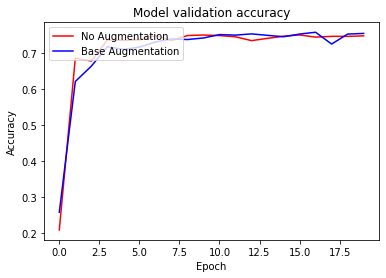

In [39]:
# 훈련 과정을 시각화
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Base Augmentation'], loc='upper left')
plt.show()

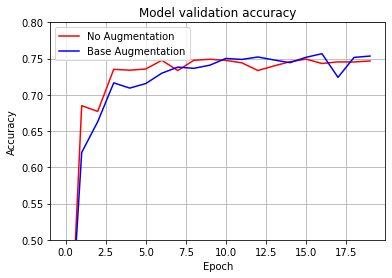

In [40]:
# 조금 더 확대해 살펴봅시다.
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Base Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # (0.72, 0.76) : 20 epoch
plt.show()

Base & CutMix Augmentation 적용한 경우

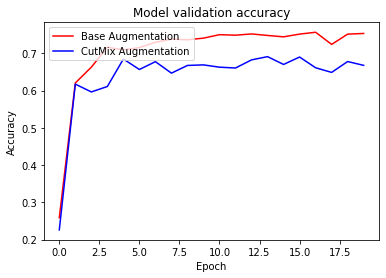

In [41]:
# 훈련 과정을 시각화
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_cutmix_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Augmentation', 'CutMix Augmentation'], loc='upper left')
plt.show()

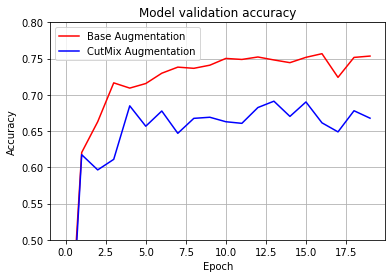

In [42]:
# 조금 더 확대해 살펴봅시다.
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_cutmix_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Augmentation', 'CutMix Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # (0.72, 0.76) : 20 epoch
plt.show()

Base & MixUp Augmentation 적용한 경우

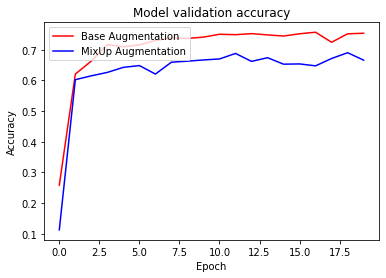

In [43]:
# 훈련 과정을 시각화
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_mixup_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Augmentation', 'MixUp Augmentation'], loc='upper left')
plt.show()

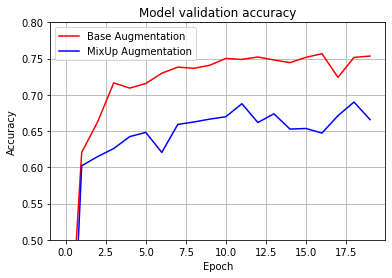

In [44]:
# 조금 더 확대해 살펴봅시다.
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_mixup_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base Augmentation', 'MixUp Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # (0.72, 0.76) : 20 epoch
plt.show()

5. Augmentation에 의한 모델 성능 비교

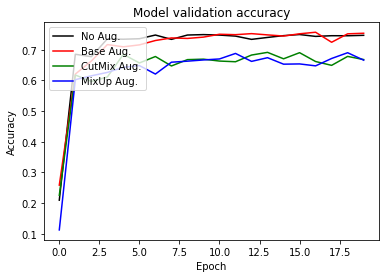

In [45]:
# 훈련 과정을 시각화
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'k')
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_cutmix_aug.history['val_accuracy'], 'g')
plt.plot(history_resnet50_mixup_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Aug.', 'Base Aug.', 'CutMix Aug.', 'MixUp Aug.'], loc='upper left')
plt.show()

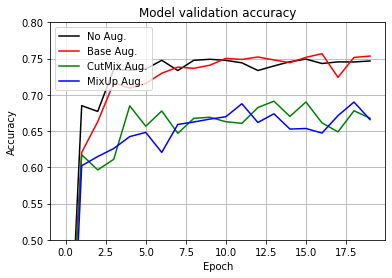

In [46]:
# 조금 더 확대해 살펴봅시다.
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'k')
plt.plot(history_resnet50_base_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_cutmix_aug.history['val_accuracy'], 'g')
plt.plot(history_resnet50_mixup_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Aug.', 'Base Aug.', 'CutMix Aug.', 'MixUp Aug.'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # (0.72, 0.76) : 20 epoch
plt.show()

회고


*   쥬피터 노트북으로 돌렸을 땐 1epoch당 300-400s 정도 걸려 시간을 많이 잡아먹었는데 코랩으로 돌리니까 30-40s 정도로 낮아져 빠르게 돌릴 수 있었다.
*   기본 aug와 no aug의 경우 미미하지만 epoch이 증가할수록 정확도가 증가함을 볼 수 있다.
*   cutmix aug와 mixup aug의 경우 epoch이 증가함에 따라 정확도가 증가하지만 기본aug와 no aug의 정확도에 0.5-1.0정도 미치지 못한다.




